In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the dataset from the URL

In [ ]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df = pd.read_csv(url)

# 1) EDA

In [ ]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


Shape of dataset

In [ ]:
df.shape

(2035, 8)

Checking if there are any NULL values

In [ ]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

Checking datatypes of features

In [ ]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

Dropping date from datset

In [ ]:
df.drop('Date',axis=1,inplace=True)

Storing the output feature separately

In [ ]:
close_output = df['Close']

In [ ]:
close_output

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

# 2) Visualization

Plotting the stock price

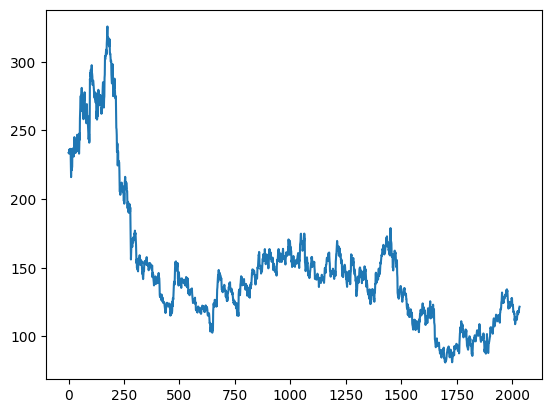

In [ ]:
plt.plot(close_output)

Splitting all the independent features

In [ ]:
cols = df.columns
cols = cols.drop('Close')

In [ ]:
cols

Index(['Open', 'High', 'Low', 'Last', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

Plotting each independent feature with output feature

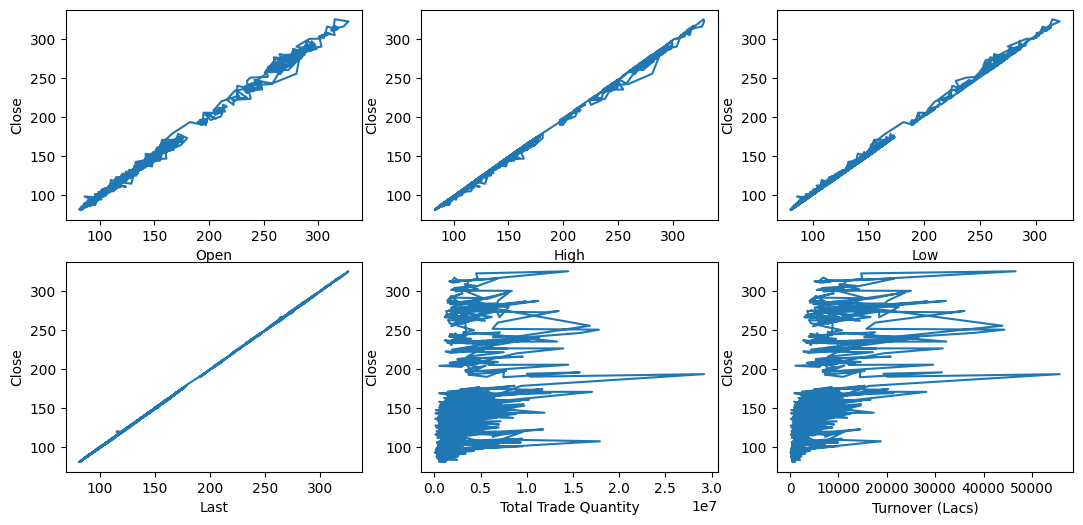

In [ ]:
plt.figure(figsize=(13,6))
m = 1
for i in cols:
  plt.subplot(2,3,m)
  plt.plot(df[i],close_output)
  plt.xlabel(i)
  plt.ylabel('Close')
  m+=1

scaling the output feature using MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(close_output).reshape(-1,1))
df_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

Creating a copy of dataset with only independent features

In [ ]:
X = df.copy()
X.drop('Close',axis=1, inplace=True)
X

,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs)
0,234.05,235.95,230.20,233.50,3069914,7162.35
1,234.55,236.80,231.10,233.80,5082859,11859.95
2,240.00,240.00,232.50,235.00,2240909,5248.60
3,233.30,236.75,232.00,236.25,2349368,5503.90
4,233.55,239.20,230.75,234.00,3423509,7999.55
...,...,...,...,...,...,...
2030,117.60,119.50,112.00,118.80,586100,694.98
2031,120.10,121.00,117.10,117.10,658440,780.01
2032,121.80,121.95,120.25,120.35,281312,340.31
2033,120.30,122.00,120.25,120.75,293312,355.17


In [ ]:
Y = df['Close']

#3) Splitting the dataset into training and testing

In [ ]:
training_size=int(len(df_close)*0.75)
test_size=len(df_close)-training_size
train_data,test_data=df_close[0:training_size,:],df_close[training_size:len(df_close),:1]

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train.shape

(1425, 100)

In [ ]:
X_test.shape

(408, 100)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

#4) Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_28 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_29 (LSTM)              (None, 50)                20200     
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_split=0.1, epochs= 60, batch_size=64, verbose = 1)

Epoch 1/60
21/21 [==============================] - 12s 255ms/step - loss: 0.0308 - val_loss: 0.0024
Epoch 2/60
21/21 [==============================] - 4s 213ms/step - loss: 0.0040 - val_loss: 0.0013
Epoch 3/60
21/21 [==============================] - 5s 229ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 4/60
21/21 [==============================] - 4s 198ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 5/60
21/21 [==============================] - 5s 243ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 6/60
21/21 [==============================] - 4s 204ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7/60
21/21 [==============================] - 4s 196ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/60
21/21 [==============================] - 5s 257ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 9/60
21/21 [==============================] - 4s 197ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 10/60
21/21 [==============================] - 4s 197ms/step - loss: 0.0012 - val_loss: 0.001

In [ ]:
predictions = model.predict(X_test)

13/13 [==============================] - 2s 44ms/step


#5) Checking the accuracy for the predicted with respect to actual stock price

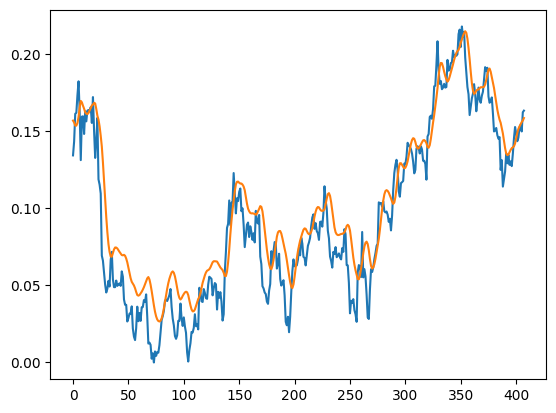

In [ ]:
plt.plot(ytest)
plt.plot(predictions)
plt.show()